# Thought Classification using Llama

In [ ]:
!pip install fastapi

In [ ]:
!pip install kaleido

In [ ]:
!pip install python-multipart

In [ ]:
!pip install uvicorn

In [ ]:
!pip install cohere

In [ ]:
!pip install openai

In [ ]:
!pip install tiktoken

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 130.8 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached scikit_build_core-0.8.1-py3-none-any.whl (139 kB)
    Using cached exceptiongroup-1.2.0-py3-none-any.whl (16 kB)
    Using cached packaging-23.2-py3-none-any.whl (53 kB)
    Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
    Using cached pathspec-0.12.1-py3-none-any.whl (31 kB)
    Using cached pyproject_metadata-0.7.1-py3-none-any.whl (7.4 kB)
  Installing build dependencies ... done
  Running command Getting requirements to build wheel
  Getting requirements to build wheel ... done
  Running command pip subprocess to install backend dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached ninja-1.11.1.1-py2.p

**Hugging Face Hub**

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub

**Importing the Llama 2 model**

In [ ]:
# Import the hf_hub_download function from the Hugging Face Hub library
from huggingface_hub import hf_hub_download

# Import the Llama class from the llama_cpp library
from llama_cpp import Llama

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**Initializing an instance of the Llama class with specified parameters**

In [ ]:
lcpp_llm = Llama(
      model_path=model_path,
      n_threads=2, #CPU cores
      n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
      n_gpu_layers=43, # Change this value based on your model and your GPU VRAM pool.
      n_ctx=4096, #context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

In [ ]:
!pip uninstall -y numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip uninstall -y setuptools

Found existing installation: setuptools 67.7.2
Uninstalling setuptools-67.7.2:
  Successfully uninstalled setuptools-67.7.2


In [ ]:
!pip install setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 17.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires numpy>=1.20.0, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
cvxpy 1.3.3 requires numpy>=1.15, which is not installed.
datascience 0.17.6 requires numpy, which is not installed.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires numpy, which is not installed.
mlxtend 0.22.0 requires numpy>=1.16.2, which is not installed.
moviepy 1.0.3 requires numpy; python_version >= "2.7", which is not installed.
moviepy 1.0.3 requires numpy>=1.17.3; python_version != "2.7", which is not installed.
nibabel 4.0.2 requires numpy>=1.17, which is not installed.
pandas-gbq 0.19.2 requires numpy>=1.16.6, which is not installed.
pymc 5.7.2 requires numpy>=1.15.0

In [ ]:
!pip install numpy

### **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the random module for generating random numbers or choices.
import random

# Import the pandas library and alias it as 'pd' for easier use.
import pandas as pd

#for split dataset
from sklearn.model_selection import train_test_split

# Import the 'json' module for handling JSON data.
import json

# Import the 'numpy' library and alias it as 'np' for convenience.
import numpy as np

# Import the 'Counter' class from the 'collections' module for counting occurrences of elements.
from collections import Counter

# Import 'tqdm' for displaying progress bars when iterating over data.
from tqdm import tqdm

import re

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data_thought.csv')

In [ ]:
# determine the shape of the DataFrame
data.shape

(156785, 2)

In [ ]:
#drop duplicate thoughts
data.drop_duplicates(inplace = True)

In [ ]:
#reseting the index of data frame since some rows have been deleted
data.reset_index(drop=True, inplace=True)

In [ ]:
data = data.dropna(how='any',axis=0) #drop null values

In [ ]:
data.shape

(129080, 2)

In [ ]:
print(data['Label'].value_counts())

positive    71185
negative    57895
Name: Label, dtype: int64


In [ ]:
#converting target variable to numeric labels
data.Label = [ 1 if each == "positive" else 0 for each in data.Label]

In [ ]:
print(data['Label'].value_counts())

1    71185
0    57895
Name: Label, dtype: int64


In [ ]:
#x_train,x_test,y_train,y_test= train_test_split(data['Thought'],data['Label'], test_size=0.2, random_state=42)
train, test= train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train.shape, test.shape

((103264, 2), (25816, 2))

In [ ]:
positive_thought=train.loc[train.Label==1, :].sample(3)
negative_thought=train.loc[train.Label==0, :].sample(3)

positive_examples containing three random positive sentiment examples, and

negative_examples containing three random negative sentiment examples.

In [ ]:
positive_thought

,Thought,Label
49150,Just a pic of my adorable cat,1
14590,Ideal chair seat height to kitchen counter rat...,1
66721,Today is going to be a great day!,1


In [ ]:
negative_thought

,Thought,Label
77622,So I bought the repress of if you leave on the...,0
41399,Food sanitation company accused of employing a...,0
85162,Poll: Americans support quick diplomatic end t...,0


In [ ]:
#concatenating the subsets of positive and negative sentiment examples (positive_examples and negative_examples)
examples = pd.concat([positive_thought, negative_thought]).to_json(orient='records')

#After concatenating the DataFrames, the to_json() method is applied to convert the combined DataFrame into a JSON (JavaScript Object Notation) format.
#The orient='records' argument specifies the format in which the JSON data should be structured.

In [ ]:
examples

'[{"Thought":"Just a pic of my adorable cat","Label":1},{"Thought":"Ideal chair seat height to kitchen counter ratio for doing dishes lol","Label":1},{"Thought":"Today is going to be a great day!","Label":1},{"Thought":"So I bought the repress of if you leave on the Spotify store thing anyone know when those go out?","Label":0},{"Thought":"Food sanitation company accused of employing at least 31 children on graveyard shifts in slaughterhouses:Packers Sanitation Services, Inc., or PSSI, a company contracted to work at slaughterhouses & meatpacking facilities.. allegedly employed at least 31 kids \\u00e2\\u20ac\\u201d one as young as 13","Label":0},{"Thought":"Poll: Americans support quick diplomatic end to war in Ukraine","Label":0}]'

### **System Message**

In [ ]:
system_message = """[INST]<<SYS>>Classify the human thinking based on the input into the following label
-negative
-positive

Thought will be delimited by triple backticks in the input.
Answer only 'positive' or 'negative'.

Instructions:
1. Classified the input only as: 'positive', 'negative'.

Your answer should strictly contain the label: 'positive' or 'negative'.
The output should be in JSON format like the following
{'Label': <positive, negative>}


Some examples of expected output are provided below as guidance.<</SYS>>[/INST]
"""

### **Prompt Template**
A prompt template is a text string that can take in a set of parameters from the end user and generate a prompt accordingly.

In [ ]:
prompt_template="""
[INST]```{input_data}```[/INST]
{output}
"""

In [ ]:
## Initialize an empty string to store few-shot examples
few_shot_examples=''

### **Few-shot Learning**

In [ ]:
## Iterate through each example in the JSON data which was created earlier
for example in json.loads(examples):

  #Extract the input data (thought) from the example, excluding the 'Label'
  example_input = {i:example[i] for i in example if i!='Label'}

  # Determine the thought prediction based on the 'Label' value
  if example['Label'] == 0:
    example_prediction ='negative'
  else:
    example_prediction ='positive'

  # Concatenate the input data and the predicted thought
  # using a template and add it to the 'few_shot_examples' string

  few_shot_examples += prompt_template.format(
      input_data=example_input['Thought'],    ###input_data is used in the prompt_template
      output=example_prediction               ###output is used in the prompt_template
  )


In [ ]:
example_input

{'Thought': 'Poll: Americans support quick diplomatic end to war in Ukraine'}

In [ ]:
few_shot_examples

'\n[INST]```Just a pic of my adorable cat```[/INST]\npositive\n\n[INST]```Ideal chair seat height to kitchen counter ratio for doing dishes lol```[/INST]\npositive\n\n[INST]```Today is going to be a great day!```[/INST]\npositive\n\n[INST]```So I bought the repress of if you leave on the Spotify store thing anyone know when those go out?```[/INST]\nnegative\n\n[INST]```Food sanitation company accused of employing at least 31 children on graveyard shifts in slaughterhouses:Packers Sanitation Services, Inc., or PSSI, a company contracted to work at slaughterhouses & meatpacking facilities.. allegedly employed at least 31 kids â€” one as young as 13```[/INST]\nnegative\n\n[INST]```Poll: Americans support quick diplomatic end to war in Ukraine```[/INST]\nnegative\n'

In [ ]:
test_rows = json.loads(
    test.sample(100).to_json(orient='records')
)

### **Making Predictions with the LLM**

In [ ]:
## Initialize empty lists to store model predictions and ground truth values.
model_predictions, ground_truths =[],[]

In [ ]:
## Iterate through each row in the test data with a progress bar
for row in tqdm(test_rows):
  # Extract the input data (thought) from the current row, excluding the 'label'
  test_input={i:row[i] for i in row if i!='Label'}
  # Construct a few-shot prompt by combining system message, few-shot examples, and test input
  few_shot_prompt = (
        system_message + few_shot_examples +
        prompt_template.format(
            input_data=test_input['Thought'],
            output=''
        )
    )
  try:
        # Use the model (lcpp_llm) to generate a response based on the few-shot prompt
        response = lcpp_llm(
            prompt=few_shot_prompt,
            max_tokens=2,
            temperature=0,
            top_p=0.95,
            repeat_penalty=1.2,
            top_k=50,
            stop=['INST'], # Dynamic stopping when such token is detected.
            echo=False # do not return the prompt
        )
        # Extract the model's prediction from the response

        prediction = response["choices"][0]["text"]


        # Append the model's prediction to the 'model_predictions' list, lowercased and stripped of whitespace
        model_predictions.append(prediction.strip().lower())

        # Determine the ground truth label based on the row's 'label' value and append it to 'ground_truths'
        if row['Label'] == 0:
            ground_truths.append('negative')
        else:
            ground_truths.append('positive')
  except ValueError as e:
          # Handle any ValueErrors that may occur during the process and continue with the next row

        print(e)
        continue

  0%|          | 0/100 [00:00<?, ?it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =     829.22 ms
llama_print_timings:      sample time =       1.08 ms /     2 runs   (    0.54 ms per token,  1851.85 tokens per second)
llama_print_timings: prompt eval time =     778.00 ms /   288 tokens (    2.70 ms per token,   370.18 tokens per second)
llama_print_timings:        eval time =      60.22 ms /     1 runs   (   60.22 ms per token,    16.60 tokens per second)
llama_print_timings:       total time =     845.91 ms /   289 tokens
  1%|          | 1/100 [00:00<01:24,  1.17it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =     829.22 ms
llama_print_timings:      sample time =       1.06 ms /     2 runs   (    0.53 ms per token,  1877.93 tokens per second)
llama_print_timings: prompt eval time =     628.52 ms /    24 tokens (   26.19 ms per token,    38.19 tokens per second)
llama_print_timings:        eval time =      51.68 ms /     1 ru

In [ ]:
few_shot_prompt

"[INST]<<SYS>>Classify the human thinking based on the input into the following label\n-negative\n-positive\n\nThought will be delimited by triple backticks in the input.\nAnswer only 'positive' or 'negative'.\n\nInstructions:\n1. Classified the input only as: 'positive', 'negative'.\n\nYour answer should strictly contain the label: 'positive' or 'negative'.\nThe output should be in JSON format like the following\n{'Label': <positive, negative>}\n\n\nSome examples of expected output are provided below as guidance.<</SYS>>[/INST]\n\n[INST]```Just a pic of my adorable cat```[/INST]\npositive\n\n[INST]```Ideal chair seat height to kitchen counter ratio for doing dishes lol```[/INST]\npositive\n\n[INST]```Today is going to be a great day!```[/INST]\npositive\n\n[INST]```So I bought the repress of if you leave on the Spotify store thing anyone know when those go out?```[/INST]\nnegative\n\n[INST]```Food sanitation company accused of employing at least 31 children on graveyard shifts in slau

In [ ]:
Counter(model_predictions) #Counter is a Python library that is often used to count the occurrences of elements in an iterable, such as a list.

Counter({'positive': 66, 'negative': 34})

In [ ]:
Counter(ground_truths)

Counter({'positive': 63, 'negative': 37})

### **Accuracy on the Test Set**

In [ ]:
ground_truths = np.array(ground_truths)
model_predictions = np.array(model_predictions)


#ground_truths contains the true labels (ground truth) for a set of examples.
#model_predictions contains the labels predicted by a machine learning model for the same set of examples.

In [ ]:
ground_truths

array(['positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'positive', 'positi

In [ ]:
model_predictions

array(['positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positi

In [ ]:
(ground_truths == model_predictions).mean()

0.85

In [ ]:
TP = ((model_predictions == 'positive') & (ground_truths == 'positive')).sum()
FP = ((model_predictions == 'positive') & (ground_truths == 'negative')).sum()
FN = ((model_predictions == 'negative') & (ground_truths == 'positive')).sum()
TN = ((model_predictions == 'negative') & (ground_truths == 'negative')).sum()
precision = TP / (TP+FP)

In [ ]:
precision

0.8636363636363636

In [ ]:
recall= TP / (TP+FN)

In [ ]:
recall

0.9047619047619048

In [ ]:
F1_score=2*((precision*recall)/(precision+recall))

In [ ]:
F1_score

0.8837209302325582

In [ ]:
Accuracy=(TN+TP)/(TN+FP+TP+FN)

In [ ]:
Accuracy

0.85

In [ ]:
from sklearn import metrics
ac = metrics.accuracy_score(ground_truths,model_predictions)

In [ ]:
ac

0.85

In [ ]:
cf_mat = metrics.confusion_matrix(ground_truths,model_predictions)

In [ ]:
cf_mat

array([[28,  9],
       [ 6, 57]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

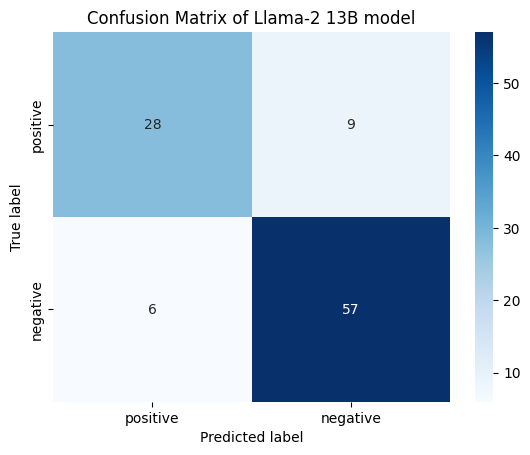

In [ ]:
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_mat, cmap=, display_labels=['Negative','Positive'])
#cm_display.plot()

sns.heatmap(cf_mat,annot = True,fmt ='g', cmap='Blues', xticklabels=['positive','negative'],
            yticklabels=['positive','negative'])

plt.title("Confusion Matrix of Llama-2 13B model")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
 print(classification_report(ground_truths,model_predictions,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.82      0.76      0.79        37
    Negative       0.86      0.90      0.88        63

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100

